# Assignment: DarkNet traffic detection

## Task:  Traffic Classification

Kaggle challenge: https://www.kaggle.com/peterfriedrich1/cicdarknet2020-internet-traffic

### CIC-Darknet2020

Darknet is the unused address space of the internet which is not speculated to interact with other computers in the world. Any communication from the dark space is considered sceptical owing to its passive listening nature which accepts incoming packets, but outgoing packets are not supported. Due to the absence of legitimate hosts in the darknet, any traffic is contemplated to be unsought and is characteristically treated as probe, backscatter, or misconfiguration. Darknets are also known as network telescopes, sinkholes, or blackholes.

Darknet traffic classification is significantly important to categorize real-time applications. Analyzing darknet traffic helps in early monitoring of malware before onslaught and detection of malicious activities after outbreak.


### Data
In CICDarknet2020 dataset, a two-layered approach is used to generate benign and darknet traffic at the first layer. The darknet traffic constitutes Audio-Stream, Browsing, Chat, Email, P2P, Transfer, Video-Stream and VOIP which is generated at the second layer. To generate the representative dataset, we amalgamated our previously generated datasets, namely, ISCXTor2016 and ISCXVPN2016, and combined the respective VPN and Tor traffic in corresponding Darknet categories. 

## Task 1: Problem Statement
Discuss the problem setting and the first implcations of the given data set... 
* What assumptions can we make about the data?
* What problems are we expecting?

## Task 2: First Data Analysis, Cleaning and Feature Extraction
* Import the data to a Pandas DataFrame
* Run first simple statistics and visualizations
* Is there a need to clean the data? If yes, do so...
* Can you use the raw data directly, or should you extract features? What features are suitable ? 


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Darknet.CSV' , encoding = "ISO-8859-1" )
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,8733.624454,229.000000,0.000000,229,229,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,4366.812227,4366.812227,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1892,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4914.004914,407.000000,0.000000,407,407,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2457.002457,2457.002457,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1987,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4640.371230,431.000000,0.000000,431,431,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2320.185615,2320.185615,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2049,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,5571.030641,359.000000,0.000000,359,359,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2785.515320,2785.515320,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2008,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,64530,6659,131,0,109.187817,22.283313,498,0,16.6475,46.833714,6604.75239,91.942711,10887.324242,11412.466412,78158,13,10778451,18268.561017,11786.143089,81171,126,10747836,26936.932331,15897.73845,78158,307,1,0,0,0,11820,8000,54.831627,37.111084,0,498,71.876008,56.93647,3241.761603,1,0,0,659,991,0,0,0,0,71.948537,109.187817,16.6475,0,0,0,0,659,6605,0,65,0,6,1382,2320,581,20,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


In [4]:
data["Label"].value_counts()

Non-Tor    93356
NonVPN     23863
VPN        22919
Tor         1392
Name: Label, dtype: int64

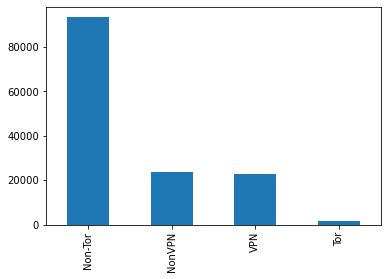

In [5]:
data["Label"].value_counts().plot.bar()

In [6]:
data["Label.1"].value_counts()

P2P                48520
Browsing           32808
Audio-Streaming    16580
Chat               11478
File-Transfer      11098
Video-Streaming     9486
Email               6145
VOIP                3566
AUDIO-STREAMING     1484
Video-streaming      281
File-transfer         84
Name: Label.1, dtype: int64

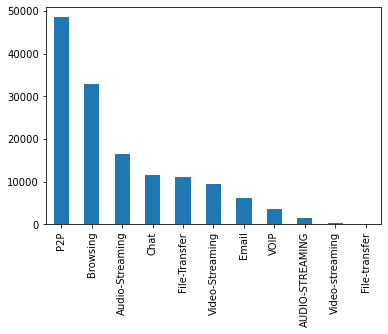

In [7]:
data["Label.1"].value_counts().plot.bar()

In [8]:
data.isnull().sum(axis = 0)

Flow ID                        0
Src IP                         0
Src Port                       0
Dst IP                         0
Dst Port                       0
Protocol                       0
Timestamp                      0
Flow Duration                  0
Total Fwd Packet               0
Total Bwd packets              0
Total Length of Fwd Packet     0
Total Length of Bwd Packet     0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                  47
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Mi

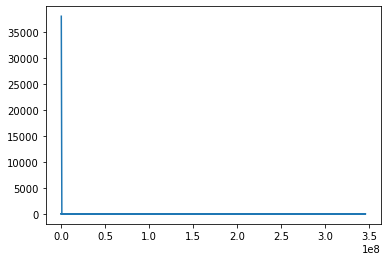

In [9]:
data["Flow Bytes/s"].value_counts().plot()

In [10]:
pd.set_option("mode.use_inf_as_na", True)
data.dropna(inplace=True)
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,8733.624454,229.000000,0.000000,229,229,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,4366.812227,4366.812227,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1892,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4914.004914,407.000000,0.000000,407,407,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2457.002457,2457.002457,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1987,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4640.371230,431.000000,0.000000,431,431,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2320.185615,2320.185615,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2049,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,5571.030641,359.000000,0.000000,359,359,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2785.515320,2785.515320,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2008,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,64530,6659,131,0,109.187817,22.283313,498,0,16.6475,46.833714,6604.75239,91.942711,10887.324242,11412.466412,78158,13,10778451,18268.561017,11786.143089,81171,126,10747836,26936.932331,15897.73845,78158,307,1,0,0,0,11820,8000,54.831627,37.111084,0,498,71.876008,56.93647,3241.761603,1,0,0,659,991,0,0,0,0,71.948537,109.187817,16.6475,0,0,0,0,659,6605,0,65,0,6,1382,2320,581,20,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


In [11]:
#data.isnull().sum(axis = 0)

In [12]:
from sklearn.preprocessing import LabelBinarizer
ip_encoder = LabelBinarizer()
data['Src IP'] = ip_encoder.fit_transform(data["Src IP"])


In [13]:
data['Dst IP'] = ip_encoder.fit_transform(data["Dst IP"])

In [14]:
#data["Timestamp"].date()

In [15]:
from sklearn.preprocessing import LabelEncoder
data['Flow ID'] = LabelEncoder().fit_transform(data['Flow ID'])
data['Timestamp'] = LabelEncoder().fit_transform(data['Timestamp'])


In [16]:
data['Label.1'] = LabelEncoder().fit_transform(data['Label.1'])

In [17]:
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,22109,0,57158,0,443,6,24614,229,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,8733.624454,229.000000,0.000000,229,229,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,4366.812227,4366.812227,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1892,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,0
1,22110,0,57159,0,443,6,24614,407,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4914.004914,407.000000,0.000000,407,407,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2457.002457,2457.002457,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1987,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,0
2,22111,0,57160,0,443,6,24614,431,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4640.371230,431.000000,0.000000,431,431,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2320.185615,2320.185615,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2049,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,0
3,29855,0,49134,0,443,6,24614,359,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,5571.030641,359.000000,0.000000,359,359,0,0.000000,0.000000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,20,20,2785.515320,2785.515320,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2008,1047,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,0
4,15439,0,34697,0,19305,6,24612,10778451,591,400,64530,6659,131,0,109.187817,22.283313,498,0,16.6475,46.833714,6604.75239,91.942711,10887.324242,11412.466412,78158,13,10778451,18268.561017,11786.143089,81171,126,10747836,26936.932331,15897.73845,78158,307,1,0,0,0,11820,8000,54.831627,37.111084,0,498,71.876008,56.93647,3241.761603,1,0,0,659,991,0,0,0,0,71.948537,109.187817,16.6475,0,0,0,0,659,6605,0,65,0,6,1382,2320,581,20,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,0


In [18]:
del data["Bwd PSH Flags"]
del data["Bwd URG Flags"]
del data["CWE Flag Count"]
del data["Active Mean"]
del data["Active Max"]

In [19]:
del data["Fwd URG Flags"]
del data["URG Flag Count"]
del data["ECE Flag Count"]
del data["Active Std"]
del data["Active Min"]

In [20]:
del data["Fwd Bytes/Bulk Avg"]
del data["Fwd Packet/Bulk Avg"]
del data["Fwd Bulk Rate Avg"]
del data["Bwd Bytes/Bulk Avg"]

In [21]:
del data["Subflow Bwd Packets"]

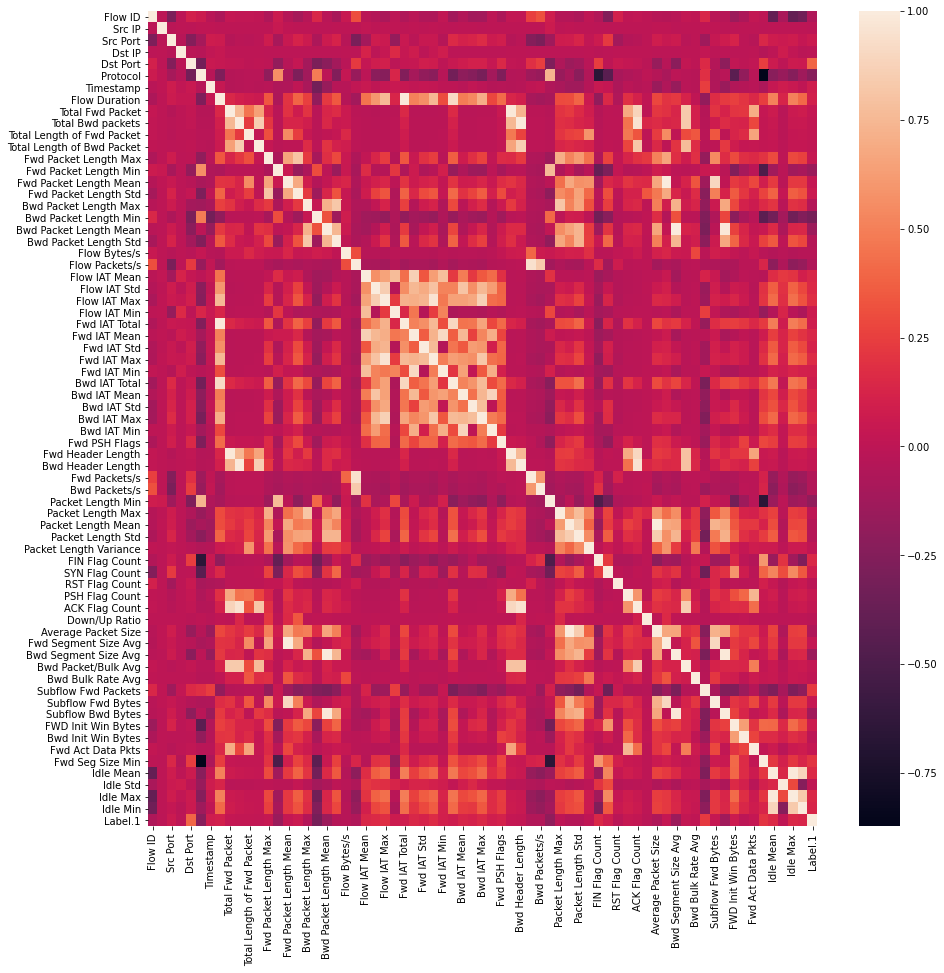

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(data=data.corr())

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
data.dtypes

Flow ID                         int64
Src IP                          int64
Src Port                        int64
Dst IP                          int64
Dst Port                        int64
Protocol                        int64
Timestamp                       int64
Flow Duration                   int64
Total Fwd Packet                int64
Total Bwd packets               int64
Total Length of Fwd Packet      int64
Total Length of Bwd Packet      int64
Fwd Packet Length Max           int64
Fwd Packet Length Min           int64
Fwd Packet Length Mean        float64
Fwd Packet Length Std         float64
Bwd Packet Length Max           int64
Bwd Packet Length Min           int64
Bwd Packet Length Mean        float64
Bwd Packet Length Std         float64
Flow Bytes/s                  float64
Flow Packets/s                float64
Flow IAT Mean                 float64
Flow IAT Std                  float64
Flow IAT Max                    int64
Flow IAT Min                    int64
Fwd IAT Tota

In [25]:
X = data.drop("Label", axis=1)
y = data["Label"]

In [26]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [27]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

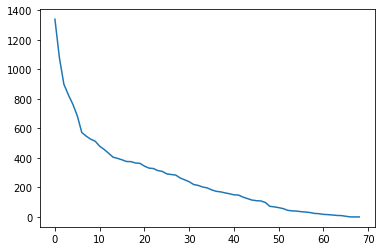

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(pca.singular_values_)

In [29]:
# cut of at 25:
pca = PCA(n_components=45)
pca.fit(X)
X_new = pca.transform(X)
print ("original X:",X.shape, " new basis: ", X_new.shape)

original X: (141481, 69)  new basis:  (141481, 45)


## Task 3: Train a  Model
* Which ML model would you choose and why?
* Train and evaluate the model using the train data
* Is the data blanced? What are the implications, how can you deal with this?
* Discuss the results -> possible improvements?


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,max_depth=None,n_jobs=-1)
rf_model = rf.fit(X_train,y_train)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, y_train); 

In [34]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)

GaussianNB()

In [35]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, random_state=1, solver='lbfgs')

In [36]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.1, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=1000,max_depth=None,n_jobs=-1)
rf2_model = rf2.fit(X_train2,y_train2)

## Task 4: Evaluate 
* report the F1-Score on the test data - Who will build the bes model?

In [38]:
from sklearn.metrics import classification_report
predictbayes = bayes.predict(X_test)
print ("Bayes:\n"+classification_report(y_test, predictbayes))

Bayes:
              precision    recall  f1-score   support

     Non-Tor       0.91      0.80      0.85      9256
      NonVPN       0.57      0.04      0.07      2398
         Tor       0.16      0.85      0.27       138
         VPN       0.38      0.82      0.52      2357

    accuracy                           0.68     14149
   macro avg       0.50      0.63      0.43     14149
weighted avg       0.75      0.68      0.66     14149



In [39]:
predictrf = rf_model.predict(X_test)
print ("Random Forest:\n"+classification_report(y_test, predictrf))

Random Forest:
              precision    recall  f1-score   support

     Non-Tor       1.00      1.00      1.00      9256
      NonVPN       1.00      1.00      1.00      2398
         Tor       0.99      0.99      0.99       138
         VPN       1.00      1.00      1.00      2357

    accuracy                           1.00     14149
   macro avg       1.00      1.00      1.00     14149
weighted avg       1.00      1.00      1.00     14149



In [40]:
predictkn = KNN_Classifier.predict(X_test)
print ("KNN:\n"+classification_report(y_test, predictkn))

KNN:
              precision    recall  f1-score   support

     Non-Tor       0.99      1.00      1.00      9256
      NonVPN       0.99      0.97      0.98      2398
         Tor       0.94      0.92      0.93       138
         VPN       0.99      0.98      0.98      2357

    accuracy                           0.99     14149
   macro avg       0.98      0.97      0.97     14149
weighted avg       0.99      0.99      0.99     14149



In [41]:
predictclf = clf.predict(X_test)
print ("MLP:\n"+classification_report(y_test, predictclf))

MLP:
              precision    recall  f1-score   support

     Non-Tor       1.00      1.00      1.00      9256
      NonVPN       1.00      1.00      1.00      2398
         Tor       0.98      0.96      0.97       138
         VPN       1.00      1.00      1.00      2357

    accuracy                           1.00     14149
   macro avg       0.99      0.99      0.99     14149
weighted avg       1.00      1.00      1.00     14149



In [43]:
predictrf2 = rf2_model.predict(X_test2)
print ("Random Forest:\n"+classification_report(y_test2, predictrf2))

Random Forest:
              precision    recall  f1-score   support

     Non-Tor       1.00      1.00      1.00      9256
      NonVPN       0.99      0.99      0.99      2398
         Tor       0.99      0.93      0.96       138
         VPN       0.99      0.99      0.99      2357

    accuracy                           1.00     14149
   macro avg       0.99      0.98      0.98     14149
weighted avg       1.00      1.00      1.00     14149

